# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


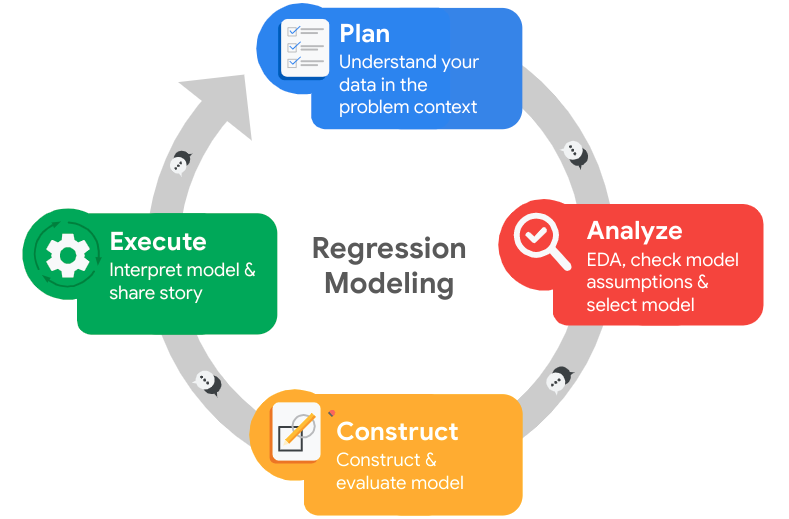

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- The primary stakeholders for this project include Senior Leadership, the Human Resources (HR) team, and Project Managers. These groups will use the insights and predictive model results to understand attrition patterns and design strategies to improve employee retention.
- The company is currently experiencing employee attrition. The goal of this project is to build a predictive model that can estimate the likelihood of employees leaving, and provide stakeholders with data-driven insights that support retention planning and workforce management.
- The dataset contains variables such as number of projects, average monthly working hours, and time spent in the company. There are no missing values in the dataset. However, 3,008 duplicate rows were identified and removed as part of data cleaning to ensure model accuracy and reliability. 
- Ethical considerations include ensuring employee data is handled responsibly and remains anonymized. Predictions should not be used to discriminate or unfairly target individuals. Instead, insights should guide supportive retention strategies rather than punitive actions. Bias in data must be checked to avoid unfair treatment across departments or demographic groups.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [19]:
# Importing Basic libraries
import numpy as np
import pandas as pd

# Importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Preprocessing libraries
from sklearn.preprocessing import StandardScaler

#Importing model Building Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# LIbraries for Evaluation
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

# pickle library
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [20]:
 # Load dataset into a dataframe
motors = pd.read_csv("HR_capstone_dataset.csv")

# Displaying first few rows of the dataframe
motors.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understanding variables
- Cleaning dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
motors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
motors.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
motors.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [21]:
# Rename columns as needed
motors.rename(columns={'number_project':'number_of_project',
                      'average_montly_hours':'average_monthly_hours',
                      'time_spend_company':'time_spent_in_company',
                      'Work_accident':'accidents_at_work',
                      'left':'attrition',
                      'Department':'department'},inplace=True)


# Display all column names after the update
motors.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_project',
       'average_monthly_hours', 'time_spent_in_company', 'accidents_at_work',
       'attrition', 'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [32]:
# Check for missing values
motors.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_project        0
average_monthly_hours    0
time_spent_in_company    0
accidents_at_work        0
attrition                0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

- there are no missing values in this data,.

### Check duplicates

Check for any duplicate entries in the data.

In [33]:
# Check for duplicates
motors.duplicated().sum()

3008

In [34]:
# Inspect some rows containing duplicates as needed
motors[motors.duplicated(keep=False)]


,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,time_spent_in_company,accidents_at_work,attrition,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [22]:
# Drop duplicates and save resulting dataframe in a new variable as needed
motors_df = motors.drop_duplicates()

# Display first few rows of new dataframe as needed
motors_df.head(7)


,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,time_spent_in_company,accidents_at_work,attrition,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

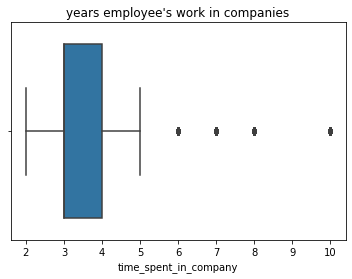

In [46]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
disp = sns.boxplot(motors_df['time_spent_in_company'])
disp.set_title("years employee's work in companies")
plt.show()

In [47]:
# Determine the number of rows containing outliers
motors_df[motors_df['time_spent_in_company']> 5]


,satisfaction_level,last_evaluation,number_of_project,average_monthly_hours,time_spent_in_company,accidents_at_work,attrition,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


- the employees working more than 5 years are considered to be outliers. here we have 824 rows whose employees work more than 5 years. But this cant be considered as outliers since its normal. Rather we should understand why employees with such experience leaved. 

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [8]:
# Get numbers of people who left vs. stayed
employee_left = motors_df['attrition'].value_counts()[1]
employee_stayed = motors_df['attrition'].value_counts()[0]
print(f'here {employee_left} left salifort, while {employee_stayed} stayed')

# Get percentages of people who left vs. stayed
print(f'the percentage of employess who left is {round((employee_left/motors_df.shape[0])*100,2)}% and who stayed are {round((employee_stayed/motors_df.shape[0])*100,2)}%')


here 1991 left salifort, while 10000 stayed
the percentage of employess who left is 16.6% and who stayed are 83.4%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

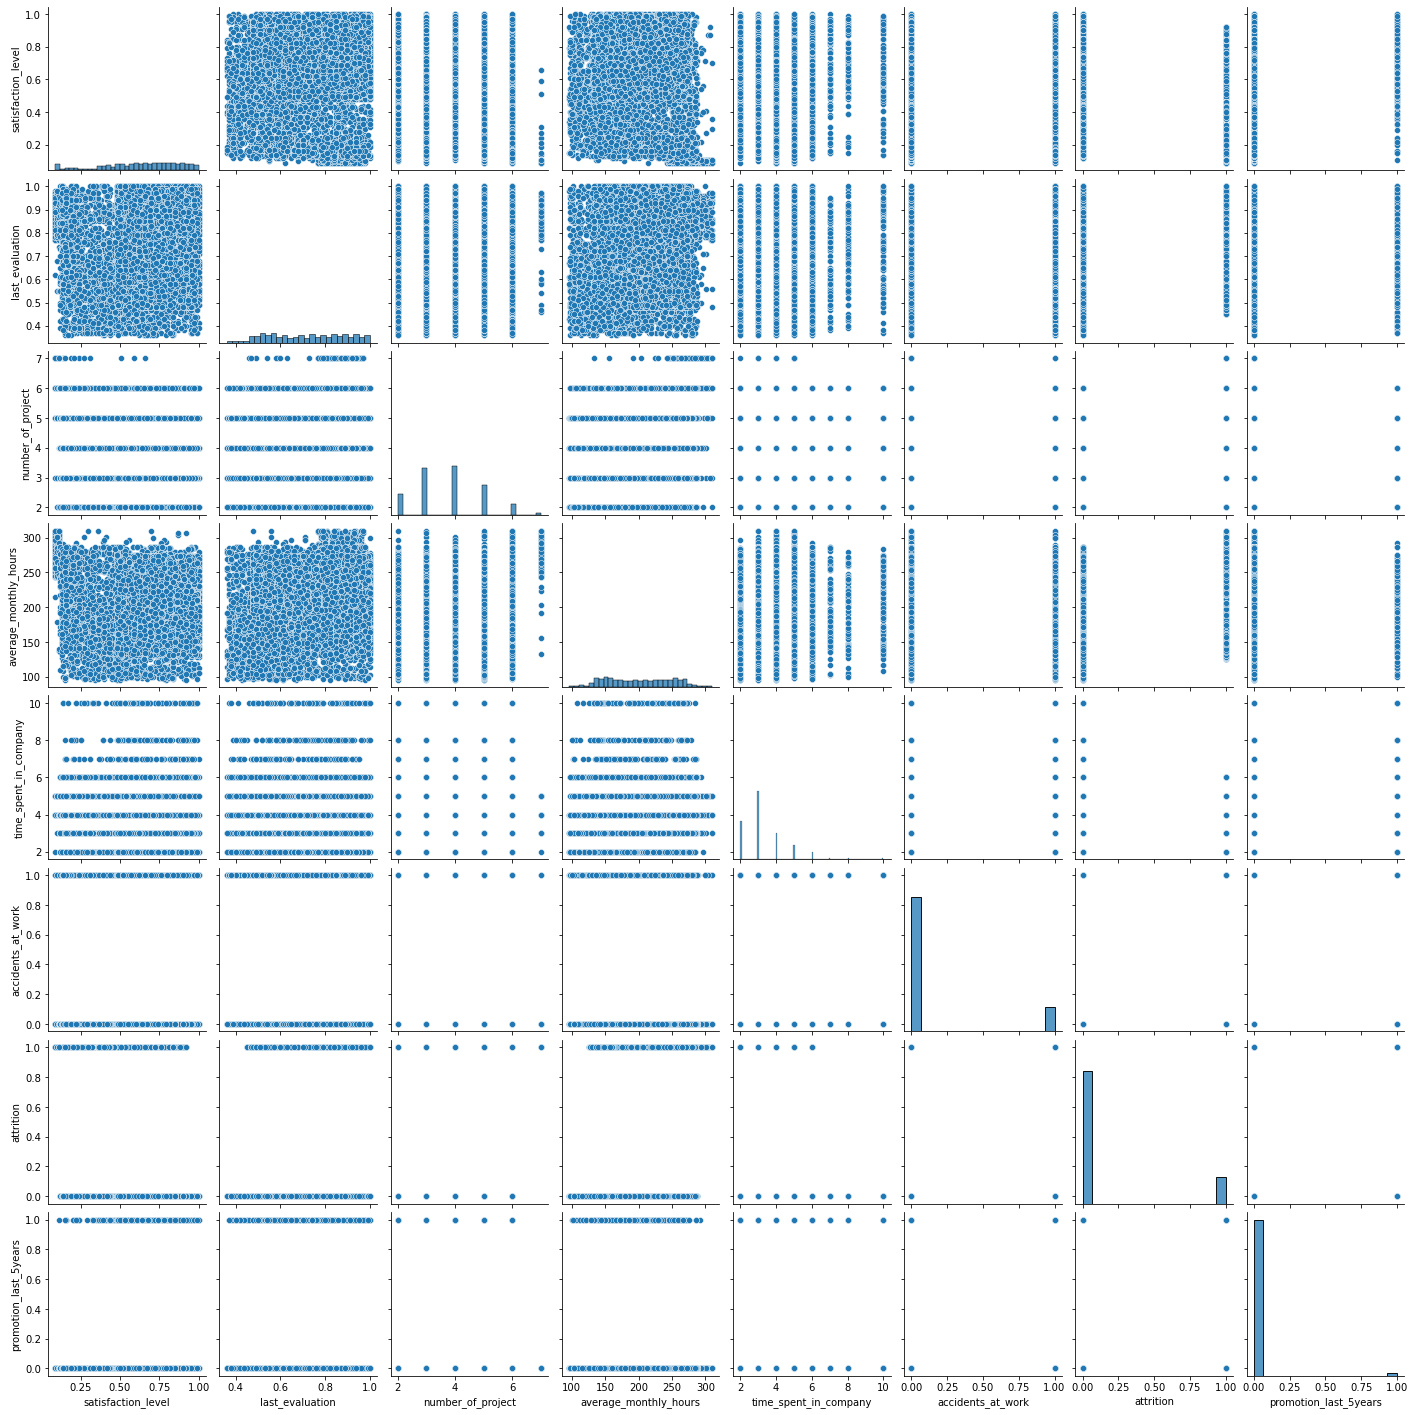

In [21]:
# Plotting a pairplot to get Linear Relationship between columns 
sns.pairplot(motors_df)

- here we can see there isnt linear relationship between columns instead shows discrete distribution of the points. 

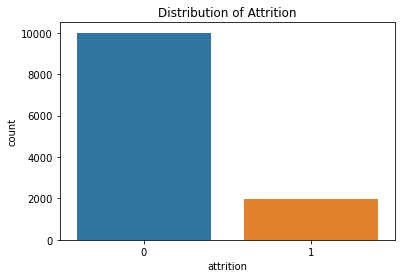

In [11]:
# Finding distribution of the Atrrition 
disp = sns.countplot(motors_df['attrition'])
disp.set_title('Distribution of Attrition')
plt.show()

The distribution of the target variable shows a clear class imbalance, with significantly more employees staying than leaving the company. As a result, model evaluation and training strategies should account for this imbalance to avoid biased predictions toward the majority class.

Text(0.5, 1.0, 'Attrition according to Satisfaction level')

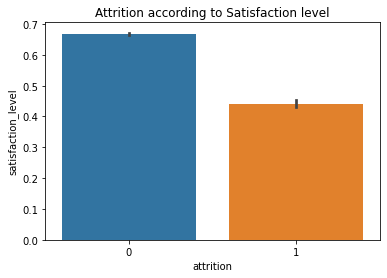

In [15]:
#Finding relation between attrition and Satisfaction level
disp = sns.barplot(x=motors_df['attrition'],y=motors_df['satisfaction_level'])
disp.set_title('Attrition according to Satisfaction level')

- As expected the Employees with lower satisfaction levels show a higher tendency to leave the company, indicating that satisfaction contributes to employee attrition. However, the difference in satisfaction levels between employees who stayed and those who left is not extreme, suggesting that satisfaction alone is not a sufficient predictor of attrition and should be considered alongside other factors.employees having less satisfaction tends to leave making satisfaction contributing in attrition but it isnt that dependent sice there is less difference in attrition .

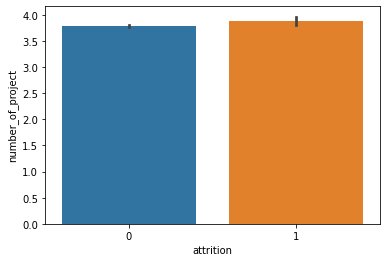

In [30]:
# relation between attrition and number of projects
disp = sns.barplot(x=motors_df['attrition'],y=motors_df['number_of_project'])

There is no strong linear relationship between the number of projects and employee attrition. However, employees assigned to a higher number of projects show a greater tendency to leave the company. This suggests that workload may play a role in attrition, and further analysis combining number of projects with tenure can help determine whether experienced employees are leaving due to sustained workload pressure.

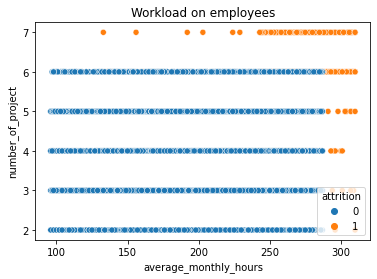

In [35]:
#checking does workload actually tends employee to leave 
disp = sns.scatterplot(x= motors_df['average_monthly_hours'],y=motors_df['number_of_project'],hue = motors_df['attrition'])
disp.set_title('Workload on employees')
plt.show()

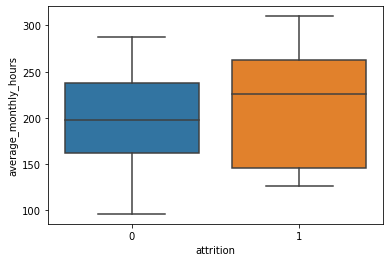

In [38]:
disp= sns.boxplot(x=motors_df['attrition'], y=motors_df['average_monthly_hours'])

Employees who tend to leave the company generally exhibit higher average monthly working hours and are assigned to a greater number of projects. This suggests that increased workload is a contributing factor to employee attrition.

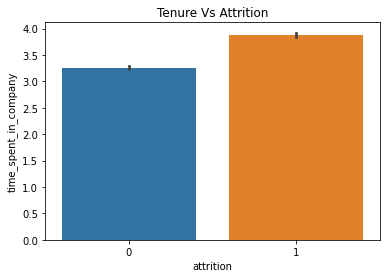

In [40]:
# tenure vs attrition
disp = sns.barplot(x = motors_df['attrition'],y=motors_df['time_spent_in_company'])
disp.set_title('Tenure Vs Attrition')
plt.show()

The analysis indicates that employees with longer tenure are more likely to leave the company, suggesting that attrition is not confined to early employment stages and may be influenced by factors such as career stagnation, limited growth opportunities, or sustained workload over time.

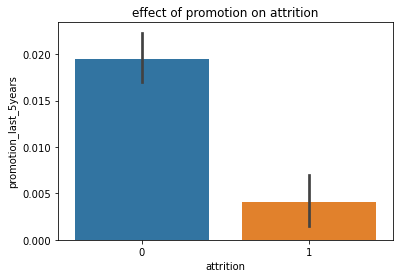

In [42]:
# does attritions depends on promotion 
disp = sns.barplot(x = motors_df['attrition'],y=motors_df['promotion_last_5years'])
disp.set_title('effect of promotion on attrition')
plt.show()

The analysis shows a strong relationship between promotion history and employee attrition. Employees who did not receive a promotion in the last five years exhibit a higher tendency to leave the company, suggesting that limited career progression is a significant factor contributing to attrition.

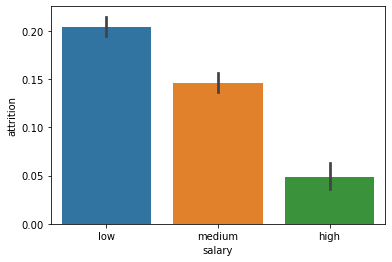

In [51]:
# Salary Vs Attrition
disp = sns.barplot(x = motors_df['salary'],y = motors_df['attrition'])

Employees with lower salary levels exhibit a higher tendency to leave the company, indicating that compensation is a contributing factor to employee attrition.

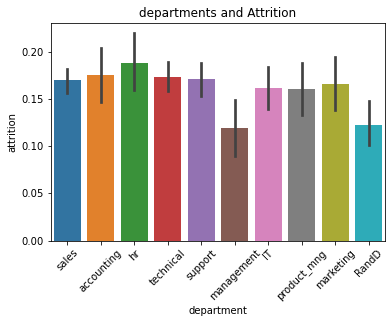

In [56]:
# Which department have high level of attrition
disp = sns.barplot(x = motors_df['department'],y = motors_df['attrition'])
disp.set_title('departments and Attrition')
plt.xticks(rotation = 45)
plt.show()

Attrition rates are relatively consistent across most departments, with no extreme variation observed. However, certain departments show slightly higher attrition levels compared to others, indicating that departmental factors may play a role in employee attrition.

### Insights

Exploratory data analysis indicates that employee attrition at Salifort Motors is influenced by multiple factors rather than a single variable. EmployeeExploratory data analysis indicates that employee attrition at Salifort Motors is influenced by multiple factors. Attrition is relatively uniform across departments, suggesting it is a company-wide issue rather than being driven by a specific team. Employees with lower satisfaction levels, higher workloads—reflected by longer working hours and more project assignments—and longer tenure show a higher tendency to leave. Additionally, lack of promotion in the last five years and lower salary levels are strongly associated with increased attrition. These findings support the need for a multivariate classification approach to effectively predict employee attrition.s with lower satisfaction levels, higher workloads—reflected by longer working hours and more project assignments—and longer tenure show a higher tendency to leave. Additionally, employees who did not receive a promotion in the last five years exhibit significantly higher attrition. These insights highlight workload pressure and limited career progression as key contributors to employee attrition and support the need for a multivariate predictive modeling approach.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

-The attrition variable is a binary target, indicating whether an employee left or stayed. Therefore, this problem is formulated as a classification task, and classification models are appropriate for predicting employee attrition.

### Identify the types of models most appropriate for this task.

- For the classification model we can use logistic regression model since our data satisfies its assumption of categorical target column, No multicollinearity

### Modeling

Add as many cells as you need to conduct the modeling process.

In [59]:
motors_final = pd.get_dummies(motors_df,drop_first=True)

In [60]:
# splitting data 
X = motors_final.drop(['attrition'],axis=1)
y = motors_final['attrition']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 7,stratify = y)

In [74]:
# fitting model
log_model = LogisticRegression(solver='liblinear',class_weight='balanced')

log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_pred = log_model.predict(X_test)

In [76]:
# evaluation metrics
print('accuracy_score: ',round(accuracy_score(y_test,y_pred),2))
print('precision_score: ',round(precision_score(y_test,y_pred),2))
print('recall_score: ',round(recall_score(y_test,y_pred),2))
print('f1_score: ',round(f1_score(y_test,y_pred),2))

accuracy_score:  0.77
precision_score:  0.41
recall_score:  0.84
f1_score:  0.55


- After applying class balancing, the model shows a substantial improvement in recall, indicating a much stronger ability to identify employees at risk of attrition. Although overall accuracy and precision decreased slightly, the improved recall and F1 score suggest that the balanced model is more suitable for proactive employee retention, where identifying potential leavers is more critical than minimizing false positives.

In [77]:
RF_model = RandomForestClassifier()

RF_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
y_pred2 = RF_model.predict(X_test)

In [81]:
# evaluation metrics
print('accuracy_score: ',round(accuracy_score(y_test,y_pred2),2))
print('precision_score: ',round(precision_score(y_test,y_pred2),2))
print('recall_score: ',round(recall_score(y_test,y_pred2),2))
print('f1_score: ',round(f1_score(y_test,y_pred2),2))

accuracy_score:  0.98
precision_score:  0.98
recall_score:  0.92
f1_score:  0.95


- The Random Forest model significantly outperforms the logistic regression baseline, achieving high accuracy, precision, recall, and F1 score. The model demonstrates strong capability in identifying employees at risk of attrition while maintaining a low false-positive rate. These results suggest that non-linear relationships and feature interactions play an important role in employee attrition, making tree-based models well-suited for this problem

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [83]:
y_prob = RF_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

print("AUC score:", auc_score)


AUC score: 0.9790895582329318


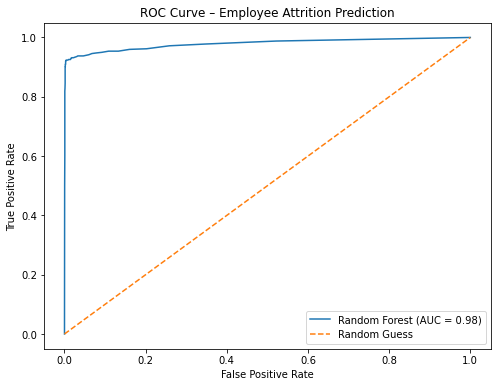

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Employee Attrition Prediction')
plt.legend()
plt.show()


The ROC–AUC curve demonstrates that the model effectively distinguishes between employees who are likely to leave and those who are likely to stay across various decision thresholds. The high AUC value indicates strong discriminatory power, confirming that the model reliably ranks employees by attrition risk and performs well on this imbalanced classification problem.

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1) The models indicate that employee attrition is strongly influenced by workload, career progression, compensation, and satisfaction. Tree-based models, particularly Random Forest, significantly outperformed linear models, suggesting that non-linear relationships and feature interactions play an important role in predicting attrition. Promotion history, workload indicators (average monthly hours and number of projects), satisfaction level, and salary emerged as the most influential predictors.
2) Based on the model results, the company should prioritize proactive retention strategies for employees identified as high risk. Key actions include monitoring excessive workloads, creating clearer promotion pathways, and reviewing compensation structures for lower-paid employees. Early intervention for employees showing high workload and low satisfaction could significantly reduce attrition.
3) Management should use the model as a decision-support tool to identify at-risk employees and implement targeted retention initiatives. Department-level interventions should be supported with company-wide policies focused on workload balance and career development, as attrition is not isolated to a single department.
4) Yes, the model could be improved by incorporating additional features such as employee engagement survey responses, performance trends over time, manager quality indicators, and work-life balance metrics. Further improvements could also be achieved through hyperparameter tuning, cross-validation, and testing alternative ensemble models.
5) Additional questions that could be addressed include identifying early warning signals for attrition, analyzing the combined impact of workload and tenure on long-term retention, and evaluating how changes in promotion or compensation policies might affect attrition rates over time.
6) Scikit-learn documentation: https://scikit-learn.org/stable/

Pandas documentation: https://pandas.pydata.org/docs/

Matplotlib documentation: https://matplotlib.org/stable/

Seaborn documentation: https://seaborn.pydata.org/

Course materials and capstone project guidelines
7) Ethical considerations include ensuring employee data privacy, avoiding misuse of predictions for punitive actions, and mitigating potential bias in model outcomes. The model should be used to support employees through retention initiatives rather than to unfairly target individuals, and predictions should be reviewed alongside human judgment.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

1️⃣ Interpret the Model

The Random Forest model demonstrates strong predictive capability by capturing non-linear relationships and interactions among employee attributes. Feature importance analysis indicates that promotion history, workload indicators (average monthly hours and number of projects), satisfaction level, salary, and tenure are the most influential factors in predicting employee attrition. This suggests that employee attrition is driven by a combination of workload pressure, limited career progression, compensation, and engagement rather than a single factor.

2️⃣ Evaluate Model Performance Using Metrics

Model performance was evaluated using accuracy, precision, recall, F1-score, and ROC–AUC to account for class imbalance. The Random Forest model achieved high accuracy and precision while maintaining strong recall, indicating its effectiveness in identifying employees at risk of attrition with minimal false negatives. The high F1-score reflects a balanced trade-off between precision and recall, and the ROC–AUC analysis confirms the model’s strong ability to distinguish between employees who leave and those who stay across different decision thresholds.

3️⃣ Prepare Results, Visualizations, and Actionable Steps for Stakeholders

The results and visualizations highlight key attrition drivers that can be translated into actionable business strategies. Stakeholders should focus on monitoring employees with high workloads, limited promotion opportunities, and lower compensation levels. Recommended actions include implementing workload balancing mechanisms, creating transparent career progression paths, and proactively engaging high-risk employees through targeted retention initiatives. These insights can support data-driven workforce planning and help reduce future attrition.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.